In [9]:
# import here
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(6789)

In [97]:
# create layers 
l1 = np.random.randn(100,64)
l2 = np.random.randn(64, 32)
l3 = np.random.randn(32, 16)
l4 = np.random.randn(16, 1)

# https://stackoverflow.com/questions/46411180/implement-relu-derivative-in-python-numpy
def relu(x): return x * (x>0)
def drelu(x):
    x[x<0] = 0
    x[x>=0 ] = 1
    return x

def sigmoid(x): return 1/(1+np.exp(-x))
def dsigmoid(x):return sigmoid(x) * (1-sigmoid(x))

class batch_norm():
    
    def __init__(): 
        self.gamma = np.ones(shape=())
        self.beta  = np.zeros(shape=())
    
    def feedforward(self,data):
        self.mean   = np.mean(data,0,keepdims=True)
        self.std    = np.std(data,0,keepdims =True)
        self.new_data  = (data-self.mean)/(self.std + 1e-8)
        self.output = self.gamma * self.new_data + self.beta
        return self.output
    
    def backprop(self,grad):
        pass
    
def batchnorm_forward(X, gamma, beta):
    mu     = np.mean(X, axis=0,keepdims=True)
    var    = np.var (X, axis=0,keepdims=True)
    X_norm = (X - mu) / np.sqrt(var + 1e-8)
    out    = gamma * X_norm + beta
    cache  = (X, X_norm, mu, var, gamma, beta)
    return out, cache

def batchnorm_backward(dout, cache):
    X, X_norm, mu, var, gamma, beta = cache

    dgamma = np.sum(dout * X_norm, axis=0)
    dbeta  = np.sum(dout, axis=0)
    
    N, D    = X.shape
    X_mu    = X - mu
    std_inv = 1. / np.sqrt(var + 1e-8)
    dX_norm = dout * gamma
    dvar    = np.sum(dX_norm * X_mu, axis=0) * -.5 * std_inv**3
    dmu     = np.sum(dX_norm * -std_inv, axis=0) + dvar * np.mean(-2. * X_mu, axis=0)
    dX      = (dX_norm * std_inv) + (dvar * 2 * X_mu / N) + (dmu / N)

    return dX, dgamma, dbeta

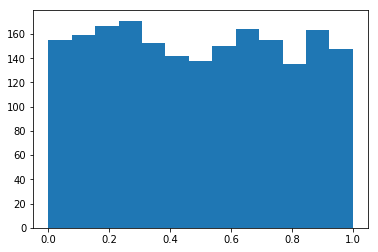

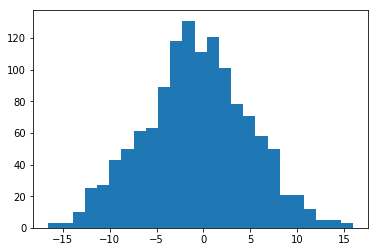

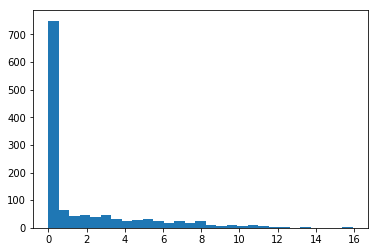

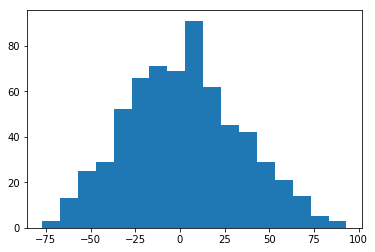

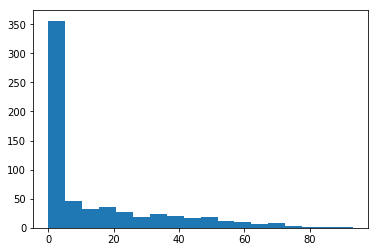

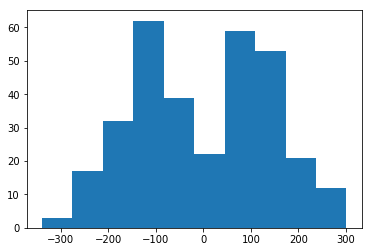

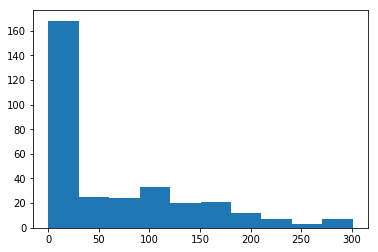

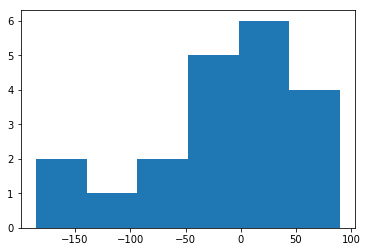

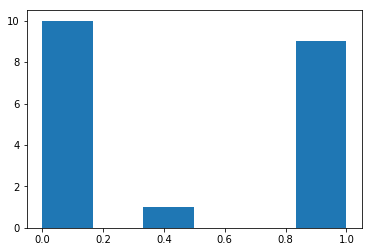

In [81]:
# perform feed forward (relu activation)
x_data = np.random.uniform(0,1,size=(20,100))
random_labels = np.random.binomial(size=(20,1), n=1, p= 0.5)

layer1 = x_data   @ l1; layer1a= relu(layer1)
layer2 = layer1a  @ l2; layer2a= relu(layer2)
layer3 = layer2a  @ l3; layer3a= relu(layer3)
layer4 = layer3a  @ l4; layer4a= sigmoid(layer4)

plt.hist(x_data.flatten(),'auto'); plt.show()
plt.hist(layer1.flatten(),'auto'); plt.show()
plt.hist(layer1a.flatten(),'auto'); plt.show()
plt.hist(layer2.flatten(),'auto'); plt.show()
plt.hist(layer2a.flatten(),'auto'); plt.show()
plt.hist(layer3.flatten(),'auto'); plt.show()
plt.hist(layer3a.flatten(),'auto'); plt.show()
plt.hist(layer4.flatten(),'auto'); plt.show()
plt.hist(layer4a.flatten(),'auto'); plt.show()

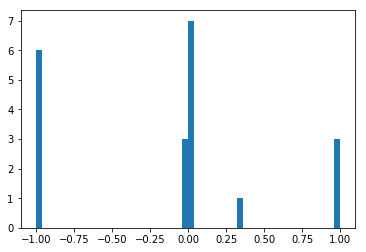

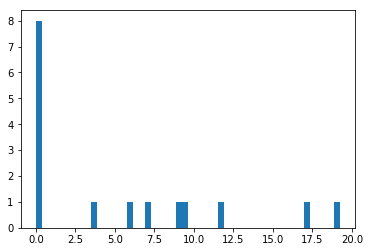

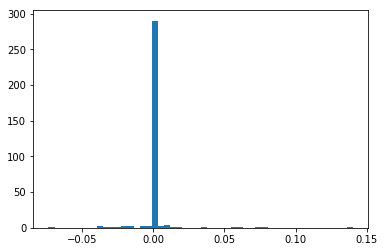

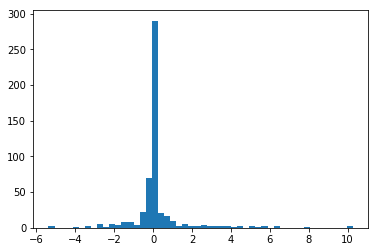

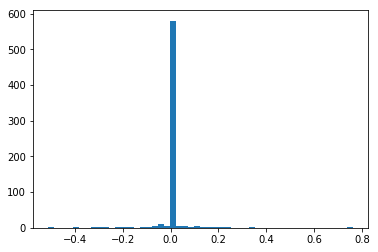

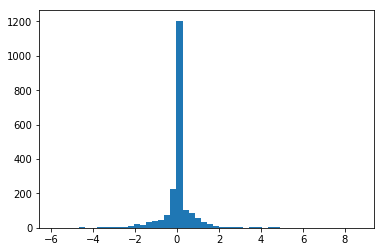

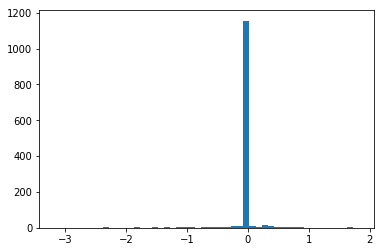

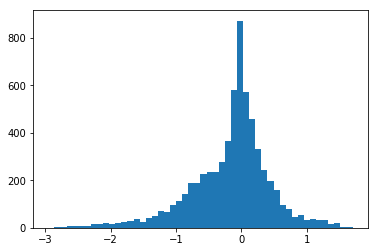

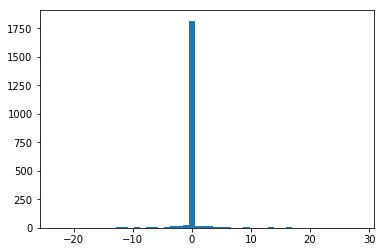

In [82]:
# perform back propagation
cost          = 0.5 * (layer4a-random_labels) ** 2
dcost         = (layer4a-random_labels)
dgrad4     = layer3a.T @ (dsigmoid(layer4) * dcost)
dgrad4pass = (dsigmoid(layer4) * dcost)   @ l4.T
dgrad3     = layer2a.T @ (drelu(layer3) * dgrad4pass) 
dgrad3pass = (drelu(layer3) * dgrad4pass) @ l3.T
dgrad2     = layer1a.T @ (drelu(layer2) * dgrad3pass) 
dgrad2pass = (drelu(layer2) * dgrad3pass) @ l2.T
dgrad1     = x_data.T  @ (drelu(layer1) * dgrad2pass) 
dgrad1pass = (drelu(layer1) * dgrad2pass) @ l1.T

plt.hist(dcost.ravel(),50); plt.show()
plt.hist(dgrad4.ravel(),50); plt.show()
plt.hist(dgrad4pass.ravel(),50); plt.show()
plt.hist(dgrad3.ravel(),50); plt.show()
plt.hist(dgrad3pass.ravel(),50); plt.show()
plt.hist(dgrad2.ravel(),50); plt.show()
plt.hist(dgrad2pass.ravel(),50); plt.show()
plt.hist(dgrad1.ravel(),50); plt.show()
plt.hist(dgrad1pass.ravel(),50); plt.show()

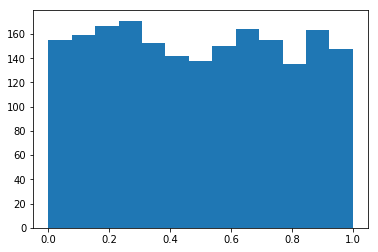

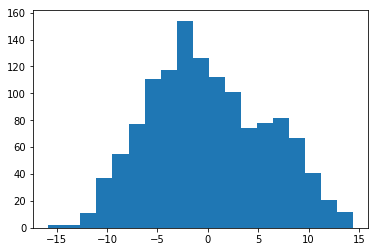

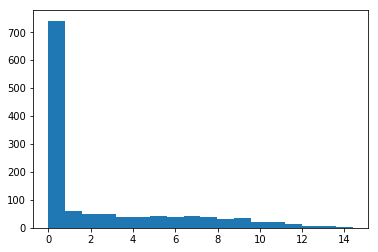

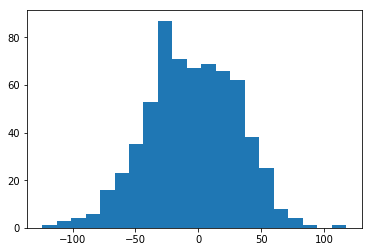

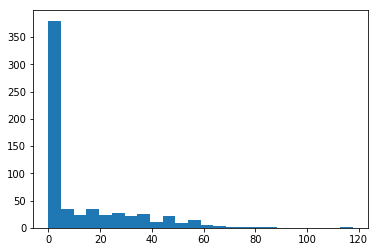

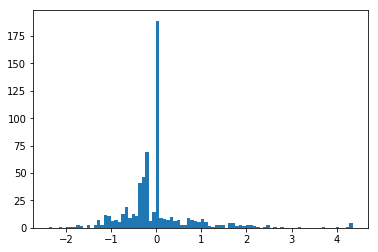

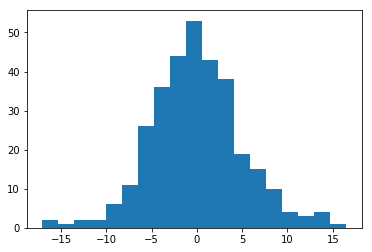

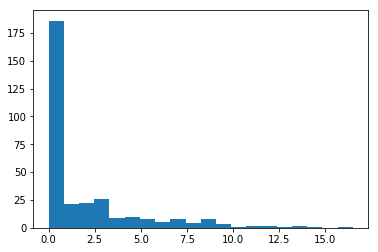

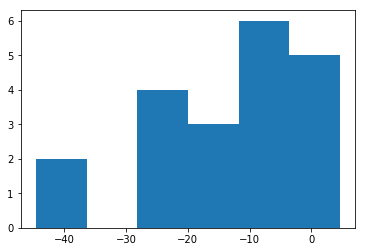

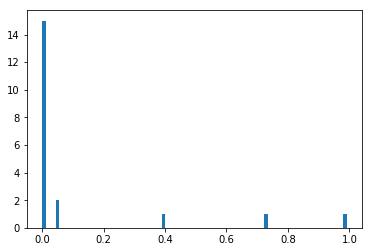

In [102]:
# add a batch norm for the propagation
layer1 = x_data   @ l1; layer1a= relu(layer1)
layer2 = layer1a  @ l2; layer2a= relu(layer2)

gamma  = np.ones(32); beta = np.zeros(32)
batch_l,cache = batchnorm_forward(layer2a,gamma,beta)

layer3 = batch_l  @ l3; layer3a= relu(layer3)
layer4 = layer3a  @ l4; layer4a= sigmoid(layer4)

plt.hist(x_data.flatten(),'auto'); plt.show()
plt.hist(layer1.flatten(),'auto'); plt.show()
plt.hist(layer1a.flatten(),'auto'); plt.show()
plt.hist(layer2.flatten(),'auto'); plt.show()
plt.hist(layer2a.flatten(),'auto'); plt.show()
plt.hist(batch_l.flatten(),'auto'); plt.show()
plt.hist(layer3.flatten(),'auto'); plt.show()
plt.hist(layer3a.flatten(),'auto'); plt.show()
plt.hist(layer4.flatten(),'auto'); plt.show()
plt.hist(layer4a.flatten(),'auto'); plt.show()

In [ ]:
# perform back prop with batch
cost          = 0.5 * (layer4a-random_labels) ** 2
dcost         = (layer4a-random_labels)
dgrad4     = layer3a.T @ (dsigmoid(layer4) * dcost)
dgrad4pass = (dsigmoid(layer4) * dcost)   @ l4.T
dgrad3     = layer2a.T @ (drelu(layer3) * dgrad4pass) 
dgrad3pass = (drelu(layer3) * dgrad4pass) @ l3.T

grad_batch,dgamma,dbeta = batchnorm_backward(dgrad3pass,cache)

dgrad2     = layer1a.T @ (drelu(layer2) * grad_batch) 
dgrad2pass = (drelu(layer2) * dgrad3pass) @ l2.T
dgrad1     = x_data.T  @ (drelu(layer1) * dgrad2pass) 
dgrad1pass = (drelu(layer1) * dgrad2pass) @ l1.T

plt.hist(dcost.ravel(),50); plt.show()
plt.hist(dgrad4.ravel(),50); plt.show()
plt.hist(dgrad4pass.ravel(),50); plt.show()
plt.hist(dgrad3.ravel(),50); plt.show()
plt.hist(dgrad3pass.ravel(),50); plt.show()

plt.hist(dgrad3pass.ravel(),50); plt.show()

plt.hist(dgrad2.ravel(),50); plt.show()
plt.hist(dgrad2pass.ravel(),50); plt.show()
plt.hist(dgrad1.ravel(),50); plt.show()
plt.hist(dgrad1pass.ravel(),50); plt.show()

In [103]:
# push to git
! git add .
! git commit -m " from mac "
! git push

[master 5c6437bc]  from mac
 2 files changed, 314 insertions(+), 62 deletions(-)
Counting objects: 7, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (7/7), done.
Writing objects: 100% (7/7), 30.60 KiB | 6.12 MiB/s, done.
Total 7 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/JaeDukSeo/Daily-Neural-Network-Practice-2
   15135adf..5c6437bc  master -> master


# Reference
1. numpy, I. (2018). Implement Relu derivative in python numpy. Stack Overflow. Retrieved 13 December 2018, from https://stackoverflow.com/questions/46411180/implement-relu-derivative-in-python-numpy
2. https://www.quora.com/How-does-batch-normalization-help
3. Implementing BatchNorm in Neural Net - Agustinus Kristiadi's Blog. (2018). Wiseodd.github.io. Retrieved 13 December 2018, from https://wiseodd.github.io/techblog/2016/07/04/batchnorm/
4. 